In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import argparse
import json
import pprint
import requests
import sys
import urllib
from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("AccusedData.csv")

In [3]:
df

District_Name      UnitName      FIRNo  Year  Month  AccusedName  \
0              Bagalkot    Amengad PS  0001/2016  2016      1  YAMxxxxxDAR   
1              Bagalkot    Amengad PS  0002/2016  2016      1  MAHxxxxxGER   
2              Bagalkot    Amengad PS  0002/2016  2016      1  HANxxxxxALI   
3              Bagalkot    Amengad PS  0002/2016  2016      1  KASxxxxxADI   
4              Bagalkot    Amengad PS  0002/2016  2016      1  RAMxxxxxDAR   
...                 ...           ...        ...   ...    ...          ...   
1048570  Chickballapura  Bagepalli PS  0228/2016  2016      8  Munxxxxxami   
1048571  Chickballapura  Bagepalli PS  0228/2016  2016      8  Chixxxxxnji   
1048572  Chickballapura  Bagepalli PS  0229/2016  2016      8  Chaxxxxxthi   
1048573  Chickballapura  Bagepalli PS  0230/2016  2016      8  Venxxxxxppa   
1048574  Chickballapura  Bagepalli PS  0231/2016  2016      8  Jamxxxxxuna   

                           Person_Name   age  Caste Profession  ...  \
0          YAMANAPPA  DURAGAPPA VADDAR  26.0  VADDA  Labourer   ...   
1           MAHANTESH VITTAPPA BADIGER  27.0    NaN        NaN  ...   
2           HANAMANTH HANAMAPPA LAGALI  25.0    NaN        NaN  ...   
3        KASINATH SHEKARAPPA MUNDEVADI  26.0    NaN        NaN  ...   
4              RAMESH DURAGAPPA WADDAR  23.0    NaN        NaN  ...   
...                                ...   ...    ...        ...  ...   
1048570                      Munishami   0.0    NaN        NaN  ...   
1048571                 Chinna Ramanji   0.0    NaN        NaN  ...   
1048572                     Chalapathi   0.0    NaN        NaN  ...   
1048573                 Venkataramappa  55.0    NaN        NaN  ...   
1048574                         Jamuna   0.0    NaN        NaN  ...   

            PresentCity PresentState PermanentAddress   PermanentCity  \
0              Bagalkot    Karnataka                ,        Bagalkot   
1              Bagalkot    Karnataka                ,        Bagalkot   
2              Bagalkot    Karnataka                ,        Bagalkot   
3              Bagalkot    Karnataka                ,        Bagalkot   
4               Raichur    Karnataka                ,         Raichur   
...                 ...          ...              ...             ...   
1048570  Chickballapura    Karnataka                ,  Chickballapura   
1048571  Chickballapura    Karnataka                ,  Chickballapura   
1048572  Chickballapura    Karnataka                ,  Chickballapura   
1048573  Chickballapura    Karnataka                ,  Chickballapura   
1048574  Chickballapura    Karnataka                ,  Chickballapura   

        PermanentState Nationality_Name      DOB Person_No      Arr_ID  \
0            Karnataka            India  00:00.0        A1  2016000003   
1            Karnataka            India  00:00.0        A2  2016000009   
2            Karnataka            India  00:00.0        A1  2016000010   
3            Karnataka            India  00:00.0        A4  2016000011   
4            Karnataka            India  00:00.0        A5  2016000007   
...                ...              ...      ...       ...         ...   
1048570      Karnataka            India  00:00.0        A4  2016000989   
1048571      Karnataka            India  00:00.0        A2  2016000990   
1048572      Karnataka            India  00:00.0        A1  2016000991   
1048573      Karnataka            India  00:00.0        A1  2016000992   
1048574      Karnataka            India  00:00.0        A1  2016000993   

             crime_no  
0        1.047010e+16  
1        1.047010e+16  
2        1.047010e+16  
3        1.047010e+16  
4        1.047010e+16  
...               ...  
1048570  1.097620e+16  
1048571  1.097620e+16  
1048572  1.097620e+16  
1048573  1.097620e+16  
1048574  1.097620e+16  

[1048575 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   District_Name     1048575 non-null  object 
 1   UnitName          1048575 non-null  object 
 2   FIRNo             1048575 non-null  object 
 3   Year              1048575 non-null  int64  
 4   Month             1048575 non-null  int64  
 5   AccusedName       1048575 non-null  object 
 6   Person_Name       1048572 non-null  object 
 7   age               1048566 non-null  float64
 8   Caste             345311 non-null   object 
 9   Profession        554776 non-null   object 
 10  Sex               1048558 non-null  object 
 11  PresentAddress    1048575 non-null  object 
 12  PresentCity       1047897 non-null  object 
 13  PresentState      1047963 non-null  object 
 14  PermanentAddress  1048575 non-null  object 
 15  PermanentCity     1047897 non-null  object 
 16  

In [5]:
df.isnull().sum()

District_Name            0
UnitName                 0
FIRNo                    0
Year                     0
Month                    0
AccusedName              0
Person_Name              3
age                      9
Caste               703264
Profession          493799
Sex                     17
PresentAddress           0
PresentCity            678
PresentState           612
PermanentAddress         0
PermanentCity          678
PermanentState         612
Nationality_Name        12
DOB                 360864
Person_No            32481
Arr_ID                   0
crime_no                 0
dtype: int64

In [6]:
df.Caste.unique()

array(['VADDA', nan, 'ACHARI', 'NEELAGAR', 'RADDY', 'KURUHINA SETTY',
       'Lingayath', 'Lambani Nayaka', 'MUSLIM', 'AMBIGA', 'KURAB',
       'SONAR', 'HATAGAR', 'DEVANGA', 'MADIGA', 'HADAPADA',
       'SHATRIYA / KSHATRI', 'GUJAR', 'GUZAR', 'CHRISTIAN',
       'PARDHI, ADVICHINCHER', 'GOLLA', 'PANCHAL', 'CHALAVADI, CHALVADI',
       'GANIGA', 'BRAHMIN', 'JANGAMA', 'BRAHMA KAPALI',
       'SAHASRARJUNA KSHATRIYA', 'HONNIYAR', 'SHAMBHUKULA KSHATRIYA',
       'LAMBANI', 'KORAMA', 'MADAR', 'KURUB', 'MADIVALA', 'VALMIKI',
       'TALAWAR / TALWAR - BOYA', 'PADMA SALE', 'HUGAR', 'REDDY',
       'BAJANTHRI', 'JAINS (DIGAMBARAS)', 'KSHATRIYA', 'KURUBA', 'NEIKAR',
       'KORAWAR', 'BHAVASAR KSHATRIYA', 'WADDAR', 'BANJARA, LAMBANI',
       'GANGAGI', 'HANDEVAZIR', 'UPPARA', 'BADIGAR', 'BANAJIGA', 'BOVI',
       'BHOVI', 'KAPU', 'KUMBARA', ' BUDAGA JANGAMA', 'KAMMARA', 'JADAR',
       'KUMARA KSHATRIYA', 'MAALGAR', 'PATEGAR', 'DEVADIGA', 'CHHETRI',
       'KORACHA', 'BHAAT', 'PANCHAMA', 'HOLA

In [7]:
df=df.drop('Caste',axis=1)

In [8]:
df=df.drop('Profession',axis=1)

In [9]:
df=df.drop('DOB',axis=1)

In [10]:
df=df.drop('Person_No',axis=1)

In [11]:
df.isnull().sum()

District_Name         0
UnitName              0
FIRNo                 0
Year                  0
Month                 0
AccusedName           0
Person_Name           3
age                   9
Sex                  17
PresentAddress        0
PresentCity         678
PresentState        612
PermanentAddress      0
PermanentCity       678
PermanentState      612
Nationality_Name     12
Arr_ID                0
crime_no              0
dtype: int64

In [12]:
df.dropna(subset=['PresentCity'],inplace=True)

In [13]:
df

District_Name      UnitName      FIRNo  Year  Month  AccusedName  \
0              Bagalkot    Amengad PS  0001/2016  2016      1  YAMxxxxxDAR   
1              Bagalkot    Amengad PS  0002/2016  2016      1  MAHxxxxxGER   
2              Bagalkot    Amengad PS  0002/2016  2016      1  HANxxxxxALI   
3              Bagalkot    Amengad PS  0002/2016  2016      1  KASxxxxxADI   
4              Bagalkot    Amengad PS  0002/2016  2016      1  RAMxxxxxDAR   
...                 ...           ...        ...   ...    ...          ...   
1048570  Chickballapura  Bagepalli PS  0228/2016  2016      8  Munxxxxxami   
1048571  Chickballapura  Bagepalli PS  0228/2016  2016      8  Chixxxxxnji   
1048572  Chickballapura  Bagepalli PS  0229/2016  2016      8  Chaxxxxxthi   
1048573  Chickballapura  Bagepalli PS  0230/2016  2016      8  Venxxxxxppa   
1048574  Chickballapura  Bagepalli PS  0231/2016  2016      8  Jamxxxxxuna   

                           Person_Name   age     Sex  \
0          YAMANAPPA  DURAGAPPA VADDAR  26.0    MALE   
1           MAHANTESH VITTAPPA BADIGER  27.0    MALE   
2           HANAMANTH HANAMAPPA LAGALI  25.0    MALE   
3        KASINATH SHEKARAPPA MUNDEVADI  26.0    MALE   
4              RAMESH DURAGAPPA WADDAR  23.0    MALE   
...                                ...   ...     ...   
1048570                      Munishami   0.0    MALE   
1048571                 Chinna Ramanji   0.0    MALE   
1048572                     Chalapathi   0.0    MALE   
1048573                 Venkataramappa  55.0    MALE   
1048574                         Jamuna   0.0  FEMALE   

                                     PresentAddress     PresentCity  \
0                           HUVINAHALLI,TQ-HUNAGUND        Bagalkot   
1               ADIHAL NOW AT RAKKASAGI,TQ-HUNAGUND        Bagalkot   
2                             RAKKASAGI,TQ-HUNAGUND        Bagalkot   
3        HUNAGUND CHANNAMMA CIRCAL NEAR,TQ-HUNAGUND        Bagalkot   
4             MASKI GANDI NAGAR IB BACK,TQ-LINGASUR         Raichur   
...                                             ...             ...   
1048570         Jiganapalli Village,Bagepalli Taluk  Chickballapura   
1048571         Jiganapalli Village,Bagepalli Taluk  Chickballapura   
1048572         Jiganapalli Village,Bagepalli Taluk  Chickballapura   
1048573         Yallampalli Village,Bagepalli Taluk  Chickballapura   
1048574         Yallampalli Village,Bagepalli Taluk  Chickballapura   

        PresentState PermanentAddress   PermanentCity PermanentState  \
0          Karnataka                ,        Bagalkot      Karnataka   
1          Karnataka                ,        Bagalkot      Karnataka   
2          Karnataka                ,        Bagalkot      Karnataka   
3          Karnataka                ,        Bagalkot      Karnataka   
4          Karnataka                ,         Raichur      Karnataka   
...              ...              ...             ...            ...   
1048570    Karnataka                ,  Chickballapura      Karnataka   
1048571    Karnataka                ,  Chickballapura      Karnataka   
1048572    Karnataka                ,  Chickballapura      Karnataka   
1048573    Karnataka                ,  Chickballapura      Karnataka   
1048574    Karnataka                ,  Chickballapura      Karnataka   

        Nationality_Name      Arr_ID      crime_no  
0                  India  2016000003  1.047010e+16  
1                  India  2016000009  1.047010e+16  
2                  India  2016000010  1.047010e+16  
3                  India  2016000011  1.047010e+16  
4                  India  2016000007  1.047010e+16  
...                  ...         ...           ...  
1048570            India  2016000989  1.097620e+16  
1048571            India  2016000990  1.097620e+16  
1048572            India  2016000991  1.097620e+16  
1048573            India  2016000992  1.097620e+16  
1048574            India  2016000993  1.097620e+16  

[1047897 rows x 18 columns]

In [14]:
df.isnull().sum()

District_Name        0
UnitName             0
FIRNo                0
Year                 0
Month                0
AccusedName          0
Person_Name          2
age                  9
Sex                 12
PresentAddress       0
PresentCity          0
PresentState         1
PermanentAddress     0
PermanentCity        0
PermanentState       1
Nationality_Name    12
Arr_ID               0
crime_no             0
dtype: int64

In [15]:
df.dropna(subset=['Nationality_Name'],inplace=True)

In [16]:
df.dropna(subset=['PresentState'],inplace=True)

In [17]:
df.dropna(subset=['Person_Name'],inplace=True)

In [18]:
df.isnull().sum()

District_Name        0
UnitName             0
FIRNo                0
Year                 0
Month                0
AccusedName          0
Person_Name          0
age                  0
Sex                 11
PresentAddress       0
PresentCity          0
PresentState         0
PermanentAddress     0
PermanentCity        0
PermanentState       0
Nationality_Name     0
Arr_ID               0
crime_no             0
dtype: int64

In [19]:
df.dropna(subset=['Sex'],inplace=True)

In [20]:
df

District_Name      UnitName      FIRNo  Year  Month  AccusedName  \
0              Bagalkot    Amengad PS  0001/2016  2016      1  YAMxxxxxDAR   
1              Bagalkot    Amengad PS  0002/2016  2016      1  MAHxxxxxGER   
2              Bagalkot    Amengad PS  0002/2016  2016      1  HANxxxxxALI   
3              Bagalkot    Amengad PS  0002/2016  2016      1  KASxxxxxADI   
4              Bagalkot    Amengad PS  0002/2016  2016      1  RAMxxxxxDAR   
...                 ...           ...        ...   ...    ...          ...   
1048570  Chickballapura  Bagepalli PS  0228/2016  2016      8  Munxxxxxami   
1048571  Chickballapura  Bagepalli PS  0228/2016  2016      8  Chixxxxxnji   
1048572  Chickballapura  Bagepalli PS  0229/2016  2016      8  Chaxxxxxthi   
1048573  Chickballapura  Bagepalli PS  0230/2016  2016      8  Venxxxxxppa   
1048574  Chickballapura  Bagepalli PS  0231/2016  2016      8  Jamxxxxxuna   

                           Person_Name   age     Sex  \
0          YAMANAPPA  DURAGAPPA VADDAR  26.0    MALE   
1           MAHANTESH VITTAPPA BADIGER  27.0    MALE   
2           HANAMANTH HANAMAPPA LAGALI  25.0    MALE   
3        KASINATH SHEKARAPPA MUNDEVADI  26.0    MALE   
4              RAMESH DURAGAPPA WADDAR  23.0    MALE   
...                                ...   ...     ...   
1048570                      Munishami   0.0    MALE   
1048571                 Chinna Ramanji   0.0    MALE   
1048572                     Chalapathi   0.0    MALE   
1048573                 Venkataramappa  55.0    MALE   
1048574                         Jamuna   0.0  FEMALE   

                                     PresentAddress     PresentCity  \
0                           HUVINAHALLI,TQ-HUNAGUND        Bagalkot   
1               ADIHAL NOW AT RAKKASAGI,TQ-HUNAGUND        Bagalkot   
2                             RAKKASAGI,TQ-HUNAGUND        Bagalkot   
3        HUNAGUND CHANNAMMA CIRCAL NEAR,TQ-HUNAGUND        Bagalkot   
4             MASKI GANDI NAGAR IB BACK,TQ-LINGASUR         Raichur   
...                                             ...             ...   
1048570         Jiganapalli Village,Bagepalli Taluk  Chickballapura   
1048571         Jiganapalli Village,Bagepalli Taluk  Chickballapura   
1048572         Jiganapalli Village,Bagepalli Taluk  Chickballapura   
1048573         Yallampalli Village,Bagepalli Taluk  Chickballapura   
1048574         Yallampalli Village,Bagepalli Taluk  Chickballapura   

        PresentState PermanentAddress   PermanentCity PermanentState  \
0          Karnataka                ,        Bagalkot      Karnataka   
1          Karnataka                ,        Bagalkot      Karnataka   
2          Karnataka                ,        Bagalkot      Karnataka   
3          Karnataka                ,        Bagalkot      Karnataka   
4          Karnataka                ,         Raichur      Karnataka   
...              ...              ...             ...            ...   
1048570    Karnataka                ,  Chickballapura      Karnataka   
1048571    Karnataka                ,  Chickballapura      Karnataka   
1048572    Karnataka                ,  Chickballapura      Karnataka   
1048573    Karnataka                ,  Chickballapura      Karnataka   
1048574    Karnataka                ,  Chickballapura      Karnataka   

        Nationality_Name      Arr_ID      crime_no  
0                  India  2016000003  1.047010e+16  
1                  India  2016000009  1.047010e+16  
2                  India  2016000010  1.047010e+16  
3                  India  2016000011  1.047010e+16  
4                  India  2016000007  1.047010e+16  
...                  ...         ...           ...  
1048570            India  2016000989  1.097620e+16  
1048571            India  2016000990  1.097620e+16  
1048572            India  2016000991  1.097620e+16  
1048573            India  2016000992  1.097620e+16  
1048574            India  2016000993  1.097620e+16  

[1047871 rows x 18 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1047871 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   District_Name     1047871 non-null  object 
 1   UnitName          1047871 non-null  object 
 2   FIRNo             1047871 non-null  object 
 3   Year              1047871 non-null  int64  
 4   Month             1047871 non-null  int64  
 5   AccusedName       1047871 non-null  object 
 6   Person_Name       1047871 non-null  object 
 7   age               1047871 non-null  float64
 8   Sex               1047871 non-null  object 
 9   PresentAddress    1047871 non-null  object 
 10  PresentCity       1047871 non-null  object 
 11  PresentState      1047871 non-null  object 
 12  PermanentAddress  1047871 non-null  object 
 13  PermanentCity     1047871 non-null  object 
 14  PermanentState    1047871 non-null  object 
 15  Nationality_Name  1047871 non-null  object 
 16  Arr_I

In [22]:
df=df.drop('PermanentAddress',axis=1)

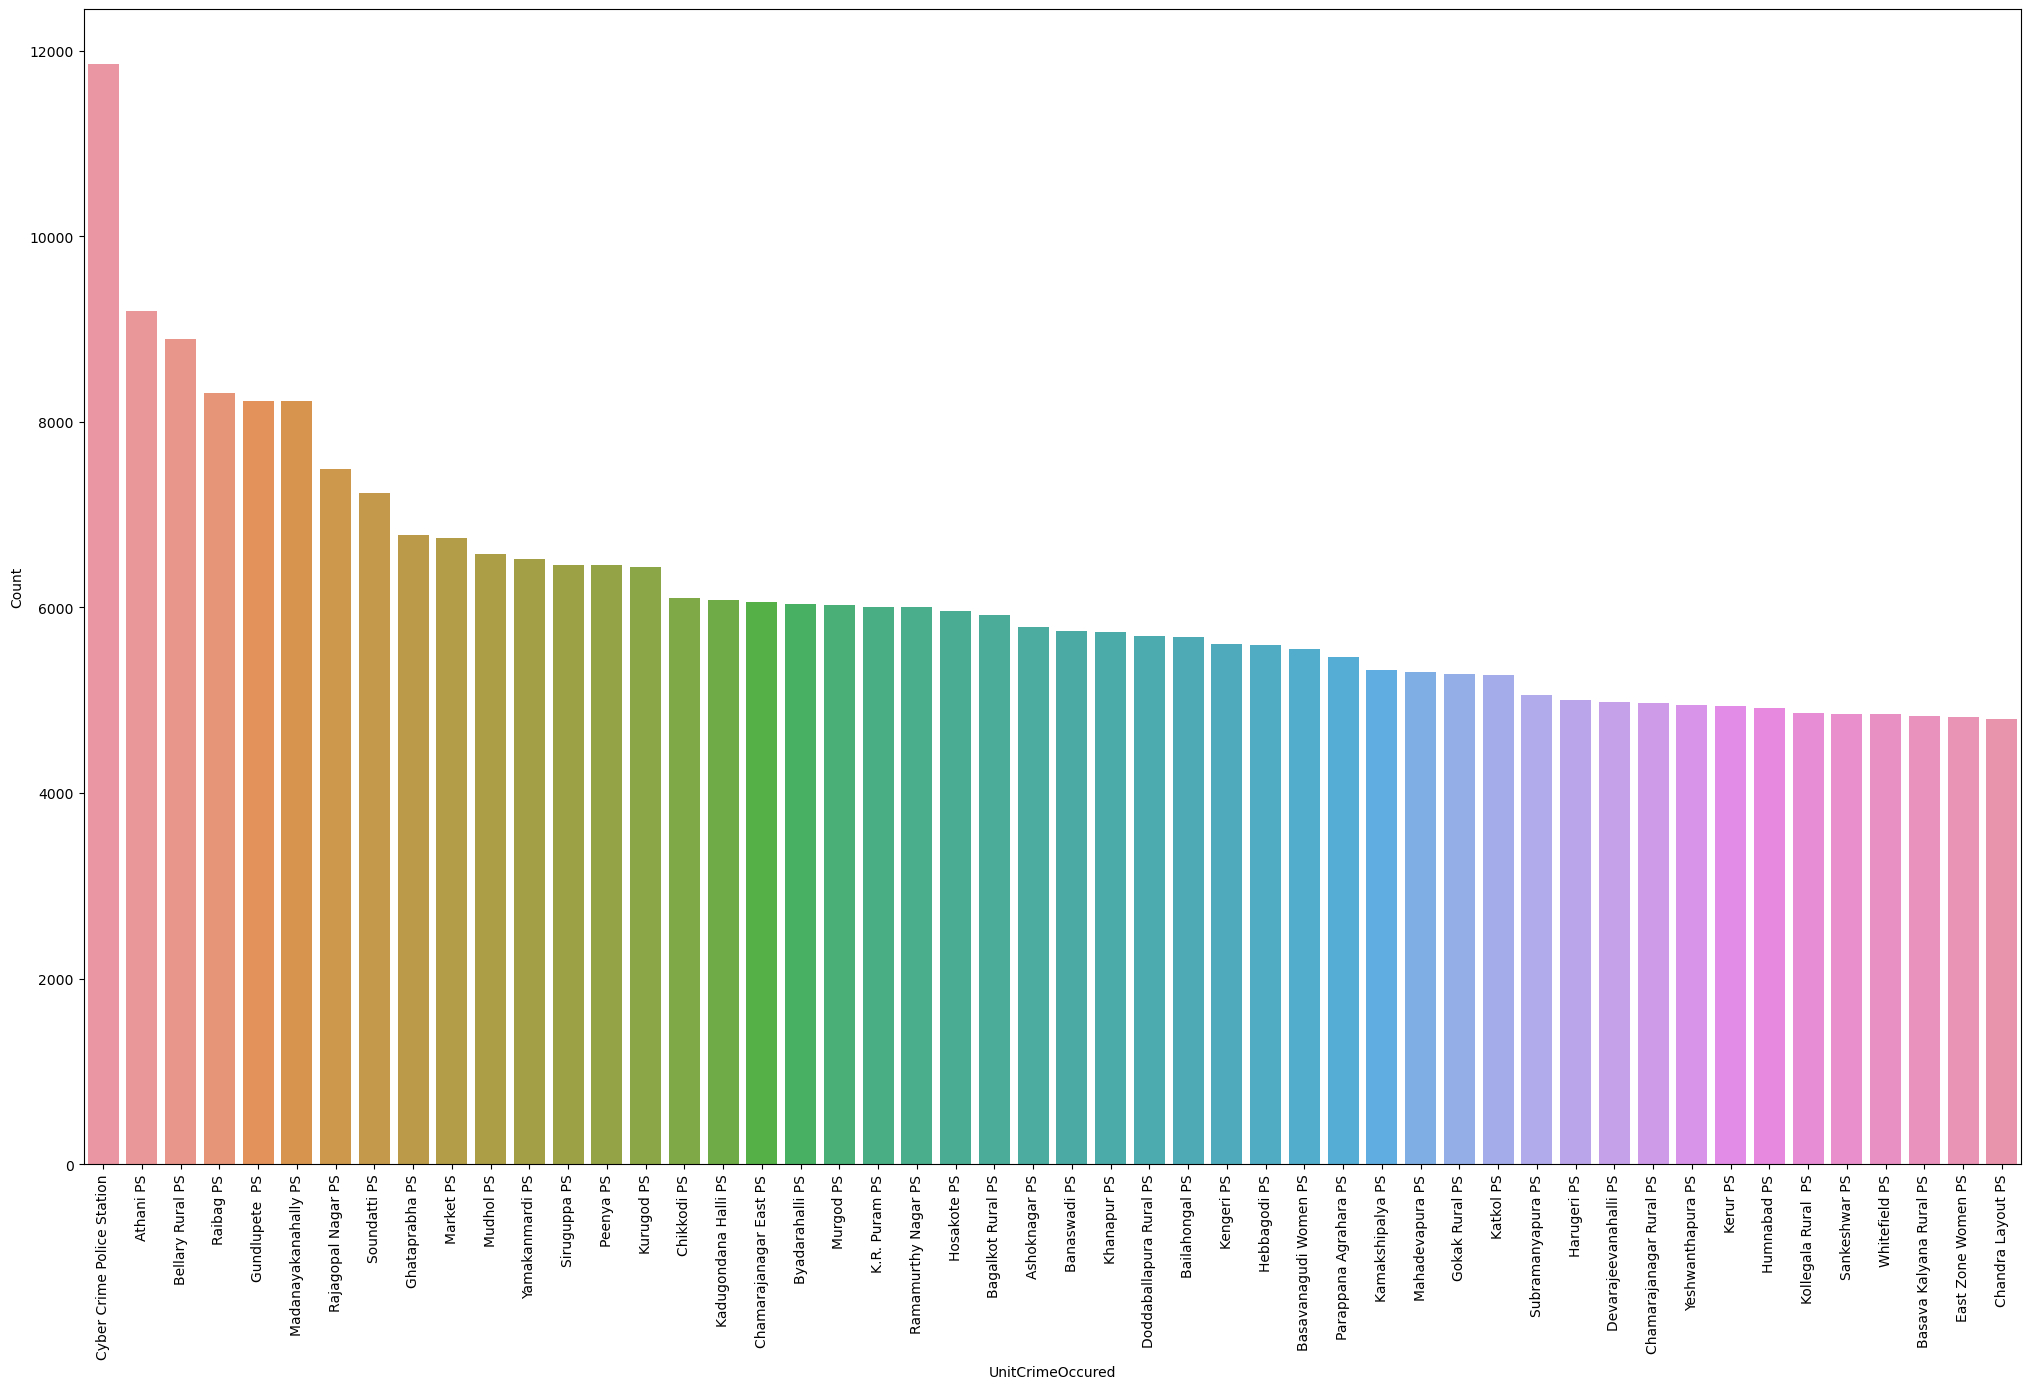

In [23]:
df2 = pd.DataFrame(columns = ['UnitCrimeOccured'])
df2["UnitCrimeOccured"]=[each for each in df.UnitName.unique()]
df2["Count"]=[len(df[df.UnitName==each]) for each in df2.UnitCrimeOccured]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.UnitCrimeOccured.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('UnitCrimeOccured')
plt.ylabel('Count')
plt.show()

In [24]:
df=df.replace([0],np.nan)

In [25]:
df

District_Name      UnitName      FIRNo  Year  Month  AccusedName  \
0              Bagalkot    Amengad PS  0001/2016  2016      1  YAMxxxxxDAR   
1              Bagalkot    Amengad PS  0002/2016  2016      1  MAHxxxxxGER   
2              Bagalkot    Amengad PS  0002/2016  2016      1  HANxxxxxALI   
3              Bagalkot    Amengad PS  0002/2016  2016      1  KASxxxxxADI   
4              Bagalkot    Amengad PS  0002/2016  2016      1  RAMxxxxxDAR   
...                 ...           ...        ...   ...    ...          ...   
1048570  Chickballapura  Bagepalli PS  0228/2016  2016      8  Munxxxxxami   
1048571  Chickballapura  Bagepalli PS  0228/2016  2016      8  Chixxxxxnji   
1048572  Chickballapura  Bagepalli PS  0229/2016  2016      8  Chaxxxxxthi   
1048573  Chickballapura  Bagepalli PS  0230/2016  2016      8  Venxxxxxppa   
1048574  Chickballapura  Bagepalli PS  0231/2016  2016      8  Jamxxxxxuna   

                           Person_Name   age     Sex  \
0          YAMANAPPA  DURAGAPPA VADDAR  26.0    MALE   
1           MAHANTESH VITTAPPA BADIGER  27.0    MALE   
2           HANAMANTH HANAMAPPA LAGALI  25.0    MALE   
3        KASINATH SHEKARAPPA MUNDEVADI  26.0    MALE   
4              RAMESH DURAGAPPA WADDAR  23.0    MALE   
...                                ...   ...     ...   
1048570                      Munishami   NaN    MALE   
1048571                 Chinna Ramanji   NaN    MALE   
1048572                     Chalapathi   NaN    MALE   
1048573                 Venkataramappa  55.0    MALE   
1048574                         Jamuna   NaN  FEMALE   

                                     PresentAddress     PresentCity  \
0                           HUVINAHALLI,TQ-HUNAGUND        Bagalkot   
1               ADIHAL NOW AT RAKKASAGI,TQ-HUNAGUND        Bagalkot   
2                             RAKKASAGI,TQ-HUNAGUND        Bagalkot   
3        HUNAGUND CHANNAMMA CIRCAL NEAR,TQ-HUNAGUND        Bagalkot   
4             MASKI GANDI NAGAR IB BACK,TQ-LINGASUR         Raichur   
...                                             ...             ...   
1048570         Jiganapalli Village,Bagepalli Taluk  Chickballapura   
1048571         Jiganapalli Village,Bagepalli Taluk  Chickballapura   
1048572         Jiganapalli Village,Bagepalli Taluk  Chickballapura   
1048573         Yallampalli Village,Bagepalli Taluk  Chickballapura   
1048574         Yallampalli Village,Bagepalli Taluk  Chickballapura   

        PresentState   PermanentCity PermanentState Nationality_Name  \
0          Karnataka        Bagalkot      Karnataka            India   
1          Karnataka        Bagalkot      Karnataka            India   
2          Karnataka        Bagalkot      Karnataka            India   
3          Karnataka        Bagalkot      Karnataka            India   
4          Karnataka         Raichur      Karnataka            India   
...              ...             ...            ...              ...   
1048570    Karnataka  Chickballapura      Karnataka            India   
1048571    Karnataka  Chickballapura      Karnataka            India   
1048572    Karnataka  Chickballapura      Karnataka            India   
1048573    Karnataka  Chickballapura      Karnataka            India   
1048574    Karnataka  Chickballapura      Karnataka            India   

             Arr_ID      crime_no  
0        2016000003  1.047010e+16  
1        2016000009  1.047010e+16  
2        2016000010  1.047010e+16  
3        2016000011  1.047010e+16  
4        2016000007  1.047010e+16  
...             ...           ...  
1048570  2016000989  1.097620e+16  
1048571  2016000990  1.097620e+16  
1048572  2016000991  1.097620e+16  
1048573  2016000992  1.097620e+16  
1048574  2016000993  1.097620e+16  

[1047871 rows x 17 columns]

In [26]:
round_Values = round(df.age.mean())
df.age.fillna(round_Values,inplace=True)

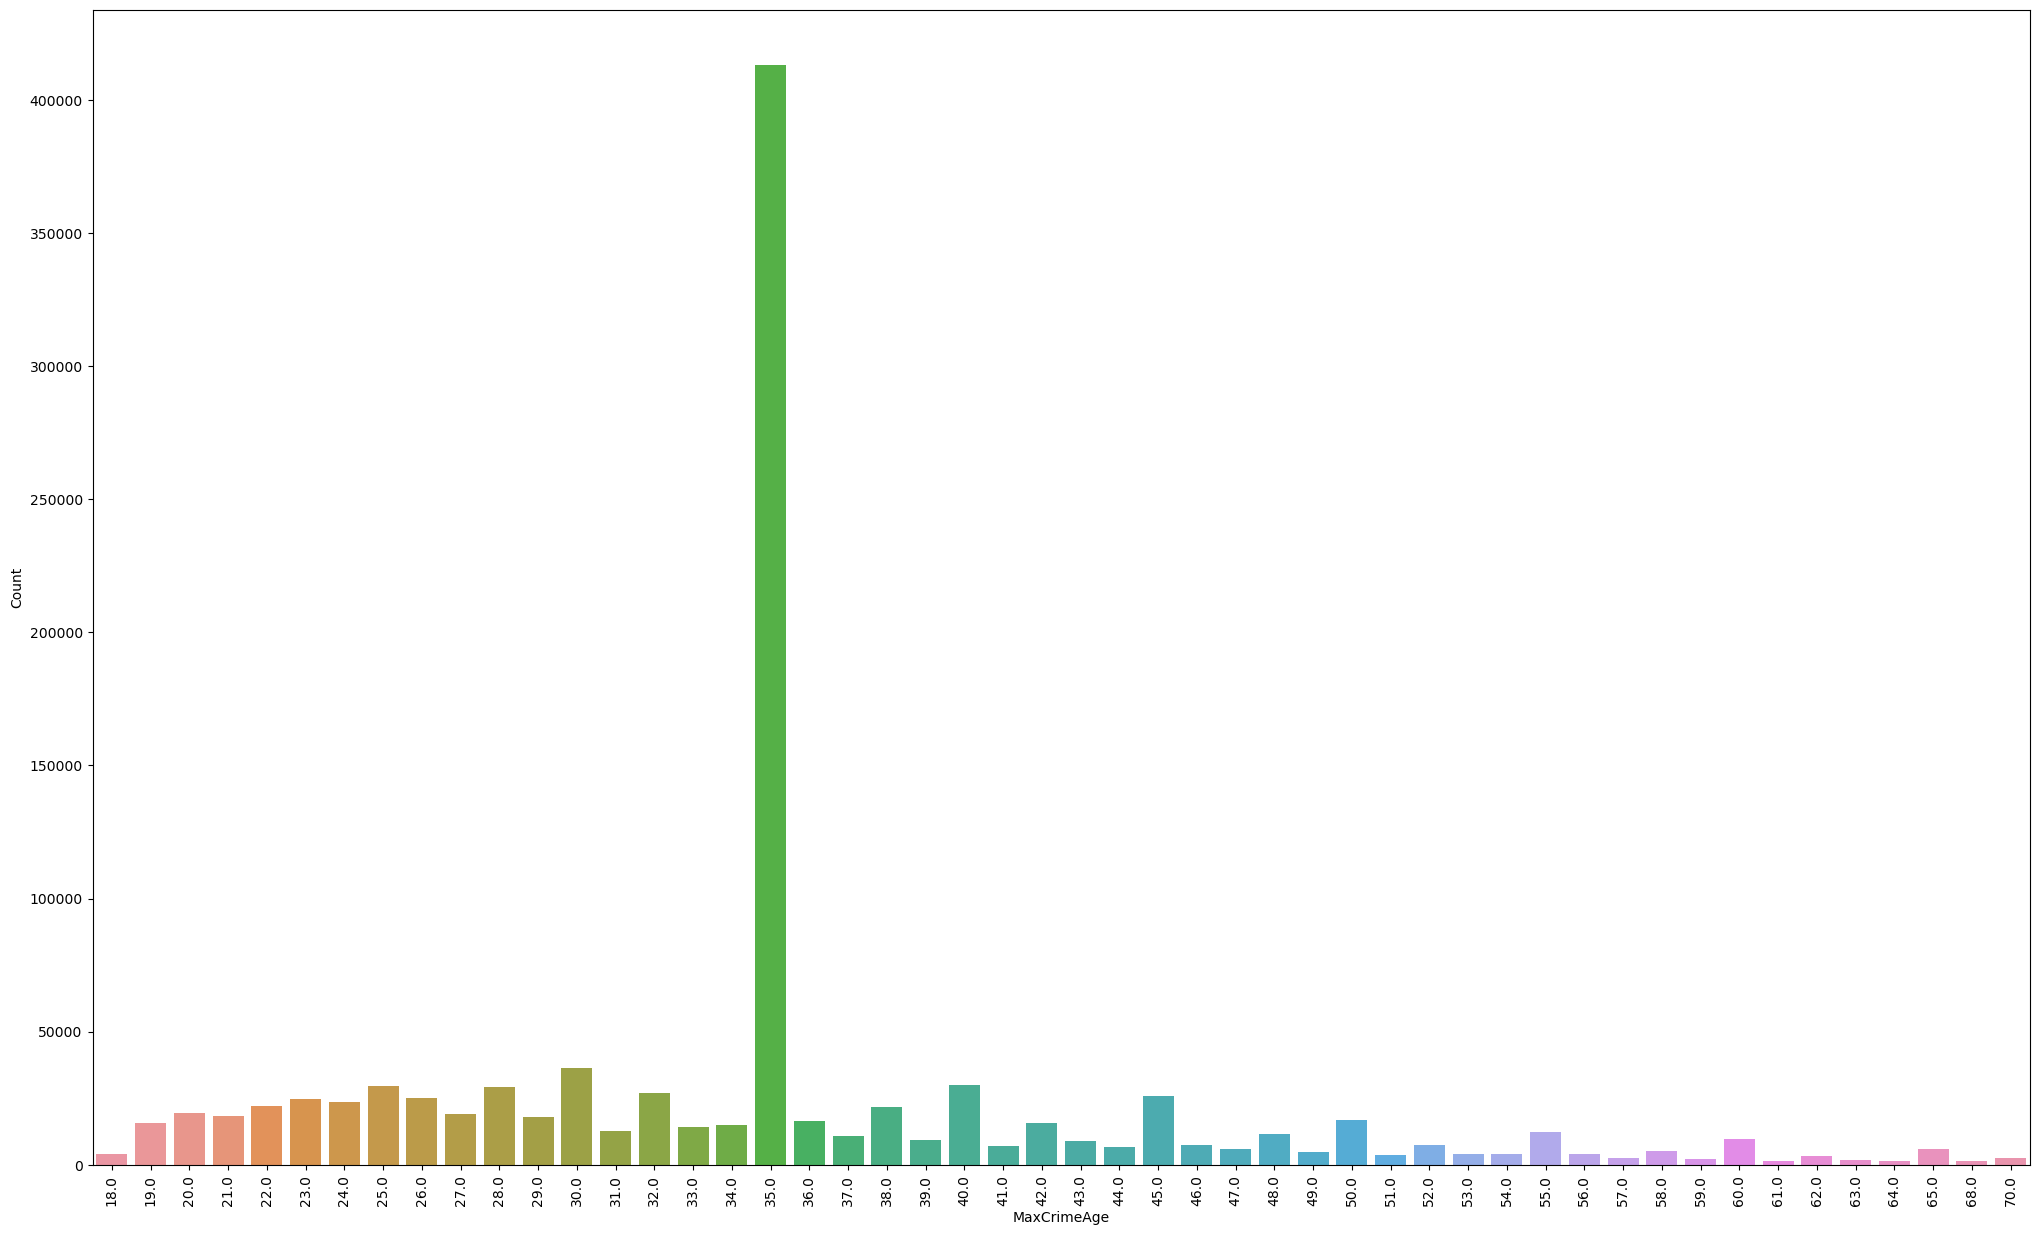

In [27]:
df2 = pd.DataFrame(columns = ['MaxCrimeAge'])
df2["MaxCrimeAge"]=[each for each in df.age.unique()]
df2["Count"]=[len(df[df.age==each]) for each in df2.MaxCrimeAge]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.MaxCrimeAge.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('MaxCrimeAge')
plt.ylabel('Count')
plt.show()

C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


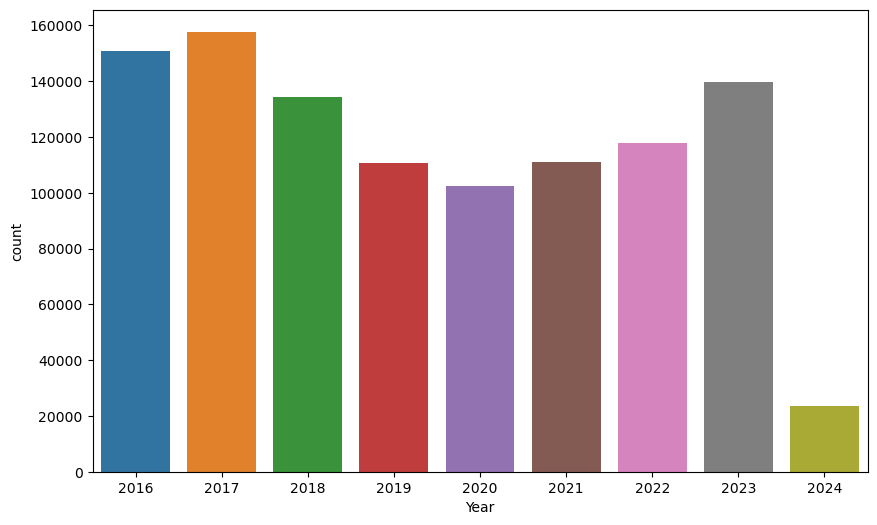

In [28]:
# Convert 'Year' column to categorical type
df['Year'] = df['Year'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.show()

In [29]:
df.describe(include='object')

District_Name                    UnitName      FIRNo  AccusedName  \
count          1047871                     1047871    1047871      1047871   
unique               9                         354      13331       232981   
top     Bengaluru City  Cyber Crime Police Station  0032/2020  Unkxxxxxown   
freq            494446                       11855        722         4175   

       Person_Name      Sex PresentAddress     PresentCity PresentState  \
count      1047871  1047871        1047871         1047871      1047871   
unique      561047        3         524568             723           38   
top        Unknown     MALE            NA,  Bengaluru City    Karnataka   
freq          3954   927516          19112          440142       994689   

         PermanentCity PermanentState Nationality_Name  
count          1047871        1047871          1047871  
unique             723             38              100  
top     Bengaluru City      Karnataka            India  
freq            440142         994689          1046081

In [30]:
df=df.replace(['NA,'],np.nan)

In [31]:
df.describe(include='object')

District_Name                    UnitName      FIRNo  AccusedName  \
count          1047871                     1047871    1047871      1047871   
unique               9                         354      13331       232981   
top     Bengaluru City  Cyber Crime Police Station  0032/2020  Unkxxxxxown   
freq            494446                       11855        722         4175   

       Person_Name      Sex PresentAddress     PresentCity PresentState  \
count      1047871  1047871        1028759         1047871      1047871   
unique      561047        3         524567             723           38   
top        Unknown     MALE     NOT KNOWN,  Bengaluru City    Karnataka   
freq          3954   927516          10387          440142       994689   

         PermanentCity PermanentState Nationality_Name  
count          1047871        1047871          1047871  
unique             723             38              100  
top     Bengaluru City      Karnataka            India  
freq            440142         994689          1046081

In [32]:
len(df.PresentAddress.unique())

524568

In [33]:
df=df.replace(['.,'],np.nan)

In [34]:
df.describe(include='object')

District_Name                    UnitName      FIRNo  AccusedName  \
count          1047871                     1047871    1047871      1047871   
unique               9                         354      13331       232981   
top     Bengaluru City  Cyber Crime Police Station  0032/2020  Unkxxxxxown   
freq            494446                       11855        722         4175   

       Person_Name      Sex PresentAddress     PresentCity PresentState  \
count      1047871  1047871        1019684         1047871      1047871   
unique      561047        3         524566             723           38   
top        Unknown     MALE     NOT KNOWN,  Bengaluru City    Karnataka   
freq          3954   927516          10387          440142       994689   

         PermanentCity PermanentState Nationality_Name  
count          1047871        1047871          1047871  
unique             723             38              100  
top     Bengaluru City      Karnataka            India  
freq            440142         994689          1046081

In [35]:
df=df.replace(['NOT KNOWN,'],np.nan)

In [36]:
df.describe(include='object')

District_Name                    UnitName      FIRNo  AccusedName  \
count          1047871                     1047871    1047871      1047871   
unique               9                         354      13331       232981   
top     Bengaluru City  Cyber Crime Police Station  0032/2020  Unkxxxxxown   
freq            494446                       11855        722         4175   

       Person_Name      Sex PresentAddress     PresentCity PresentState  \
count      1047871  1047871        1009297         1047871      1047871   
unique      561047        3         524565             723           38   
top        Unknown     MALE     Not Known,  Bengaluru City    Karnataka   
freq          3954   927516          10340          440142       994689   

         PermanentCity PermanentState Nationality_Name  
count          1047871        1047871          1047871  
unique             723             38              100  
top     Bengaluru City      Karnataka            India  
freq            440142         994689          1046081

In [37]:
df=df.replace(['Not Known,'],np.nan)

In [38]:
df.describe(include='object')

District_Name                    UnitName      FIRNo  AccusedName  \
count          1047871                     1047871    1047871      1047871   
unique               9                         354      13331       232981   
top     Bengaluru City  Cyber Crime Police Station  0032/2020  Unkxxxxxown   
freq            494446                       11855        722         4175   

       Person_Name      Sex PresentAddress     PresentCity PresentState  \
count      1047871  1047871         998957         1047871      1047871   
unique      561047        3         524564             723           38   
top        Unknown     MALE           N/A,  Bengaluru City    Karnataka   
freq          3954   927516           6765          440142       994689   

         PermanentCity PermanentState Nationality_Name  
count          1047871        1047871          1047871  
unique             723             38              100  
top     Bengaluru City      Karnataka            India  
freq            440142         994689          1046081

In [39]:
df=df.replace(['-,'],np.nan)

In [40]:
df.describe(include='object')

District_Name                    UnitName      FIRNo  AccusedName  \
count          1047871                     1047871    1047871      1047871   
unique               9                         354      13331       232981   
top     Bengaluru City  Cyber Crime Police Station  0032/2020  Unkxxxxxown   
freq            494446                       11855        722         4175   

       Person_Name      Sex PresentAddress     PresentCity PresentState  \
count      1047871  1047871         994110         1047871      1047871   
unique      561047        3         524563             723           38   
top        Unknown     MALE           N/A,  Bengaluru City    Karnataka   
freq          3954   927516           6765          440142       994689   

         PermanentCity PermanentState Nationality_Name  
count          1047871        1047871          1047871  
unique             723             38              100  
top     Bengaluru City      Karnataka            India  
freq            440142         994689          1046081

In [41]:
df=df.replace(['Unknown,'],np.nan)

In [42]:
df.describe(include='object')

District_Name                    UnitName      FIRNo  AccusedName  \
count          1047871                     1047871    1047871      1047871   
unique               9                         354      13331       232981   
top     Bengaluru City  Cyber Crime Police Station  0032/2020  Unkxxxxxown   
freq            494446                       11855        722         4175   

       Person_Name      Sex PresentAddress     PresentCity PresentState  \
count      1047871  1047871         990129         1047871      1047871   
unique      561047        3         524562             723           38   
top        Unknown     MALE           N/A,  Bengaluru City    Karnataka   
freq          3954   927516           6765          440142       994689   

         PermanentCity PermanentState Nationality_Name  
count          1047871        1047871          1047871  
unique             723             38              100  
top     Bengaluru City      Karnataka            India  
freq            440142         994689          1046081

In [43]:
df=df.replace(['N/A,'],np.nan)

In [44]:
df.describe(include='object')

District_Name                    UnitName      FIRNo  AccusedName  \
count          1047871                     1047871    1047871      1047871   
unique               9                         354      13331       232981   
top     Bengaluru City  Cyber Crime Police Station  0032/2020  Unkxxxxxown   
freq            494446                       11855        722         4175   

       Person_Name      Sex PresentAddress     PresentCity PresentState  \
count      1047871  1047871         983364         1047871      1047871   
unique      561047        3         524561             723           38   
top        Unknown     MALE          NA,NA  Bengaluru City    Karnataka   
freq          3954   927516           3718          440142       994689   

         PermanentCity PermanentState Nationality_Name  
count          1047871        1047871          1047871  
unique             723             38              100  
top     Bengaluru City      Karnataka            India  
freq            440142         994689          1046081

In [45]:
df=df.replace(['UNKNOWN,'],np.nan)

In [46]:
df.describe(include='object')

District_Name                    UnitName      FIRNo  AccusedName  \
count          1047871                     1047871    1047871      1047871   
unique               9                         354      13331       232981   
top     Bengaluru City  Cyber Crime Police Station  0032/2020  Unkxxxxxown   
freq            494446                       11855        722         4175   

       Person_Name      Sex PresentAddress     PresentCity PresentState  \
count      1047871  1047871         979714         1047871      1047871   
unique      561047        3         524560             723           38   
top        Unknown     MALE          NA,NA  Bengaluru City    Karnataka   
freq          3954   927516           3718          440142       994689   

         PermanentCity PermanentState Nationality_Name  
count          1047871        1047871          1047871  
unique             723             38              100  
top     Bengaluru City      Karnataka            India  
freq            440142         994689          1046081

In [47]:
df=df.replace(['Not known,'],np.nan)

In [48]:
df.describe(include='object')

District_Name                    UnitName      FIRNo  AccusedName  \
count          1047871                     1047871    1047871      1047871   
unique               9                         354      13331       232981   
top     Bengaluru City  Cyber Crime Police Station  0032/2020  Unkxxxxxown   
freq            494446                       11855        722         4175   

       Person_Name      Sex PresentAddress     PresentCity PresentState  \
count      1047871  1047871         976416         1047871      1047871   
unique      561047        3         524559             723           38   
top        Unknown     MALE          NA,NA  Bengaluru City    Karnataka   
freq          3954   927516           3718          440142       994689   

         PermanentCity PermanentState Nationality_Name  
count          1047871        1047871          1047871  
unique             723             38              100  
top     Bengaluru City      Karnataka            India  
freq            440142         994689          1046081

In [49]:
df=df.replace(['NA,NA'],np.nan)

In [50]:
df.describe(include='object')

District_Name                    UnitName      FIRNo  AccusedName  \
count          1047871                     1047871    1047871      1047871   
unique               9                         354      13331       232981   
top     Bengaluru City  Cyber Crime Police Station  0032/2020  Unkxxxxxown   
freq            494446                       11855        722         4175   

       Person_Name      Sex PresentAddress     PresentCity PresentState  \
count      1047871  1047871         972698         1047871      1047871   
unique      561047        3         524558             723           38   
top        Unknown     MALE     BANGALORE,  Bengaluru City    Karnataka   
freq          3954   927516           3524          440142       994689   

         PermanentCity PermanentState Nationality_Name  
count          1047871        1047871          1047871  
unique             723             38              100  
top     Bengaluru City      Karnataka            India  
freq            440142         994689          1046081

In [51]:
df.isnull().sum()

District_Name           0
UnitName                0
FIRNo                   0
Year                    0
Month                   0
AccusedName             0
Person_Name             0
age                     0
Sex                     0
PresentAddress      75173
PresentCity             0
PresentState            0
PermanentCity           0
PermanentState          0
Nationality_Name        0
Arr_ID                  0
crime_no                0
dtype: int64

In [52]:
df

District_Name      UnitName      FIRNo  Year  Month  AccusedName  \
0              Bagalkot    Amengad PS  0001/2016  2016      1  YAMxxxxxDAR   
1              Bagalkot    Amengad PS  0002/2016  2016      1  MAHxxxxxGER   
2              Bagalkot    Amengad PS  0002/2016  2016      1  HANxxxxxALI   
3              Bagalkot    Amengad PS  0002/2016  2016      1  KASxxxxxADI   
4              Bagalkot    Amengad PS  0002/2016  2016      1  RAMxxxxxDAR   
...                 ...           ...        ...   ...    ...          ...   
1048570  Chickballapura  Bagepalli PS  0228/2016  2016      8  Munxxxxxami   
1048571  Chickballapura  Bagepalli PS  0228/2016  2016      8  Chixxxxxnji   
1048572  Chickballapura  Bagepalli PS  0229/2016  2016      8  Chaxxxxxthi   
1048573  Chickballapura  Bagepalli PS  0230/2016  2016      8  Venxxxxxppa   
1048574  Chickballapura  Bagepalli PS  0231/2016  2016      8  Jamxxxxxuna   

                           Person_Name   age     Sex  \
0          YAMANAPPA  DURAGAPPA VADDAR  26.0    MALE   
1           MAHANTESH VITTAPPA BADIGER  27.0    MALE   
2           HANAMANTH HANAMAPPA LAGALI  25.0    MALE   
3        KASINATH SHEKARAPPA MUNDEVADI  26.0    MALE   
4              RAMESH DURAGAPPA WADDAR  23.0    MALE   
...                                ...   ...     ...   
1048570                      Munishami  35.0    MALE   
1048571                 Chinna Ramanji  35.0    MALE   
1048572                     Chalapathi  35.0    MALE   
1048573                 Venkataramappa  55.0    MALE   
1048574                         Jamuna  35.0  FEMALE   

                                     PresentAddress     PresentCity  \
0                           HUVINAHALLI,TQ-HUNAGUND        Bagalkot   
1               ADIHAL NOW AT RAKKASAGI,TQ-HUNAGUND        Bagalkot   
2                             RAKKASAGI,TQ-HUNAGUND        Bagalkot   
3        HUNAGUND CHANNAMMA CIRCAL NEAR,TQ-HUNAGUND        Bagalkot   
4             MASKI GANDI NAGAR IB BACK,TQ-LINGASUR         Raichur   
...                                             ...             ...   
1048570         Jiganapalli Village,Bagepalli Taluk  Chickballapura   
1048571         Jiganapalli Village,Bagepalli Taluk  Chickballapura   
1048572         Jiganapalli Village,Bagepalli Taluk  Chickballapura   
1048573         Yallampalli Village,Bagepalli Taluk  Chickballapura   
1048574         Yallampalli Village,Bagepalli Taluk  Chickballapura   

        PresentState   PermanentCity PermanentState Nationality_Name  \
0          Karnataka        Bagalkot      Karnataka            India   
1          Karnataka        Bagalkot      Karnataka            India   
2          Karnataka        Bagalkot      Karnataka            India   
3          Karnataka        Bagalkot      Karnataka            India   
4          Karnataka         Raichur      Karnataka            India   
...              ...             ...            ...              ...   
1048570    Karnataka  Chickballapura      Karnataka            India   
1048571    Karnataka  Chickballapura      Karnataka            India   
1048572    Karnataka  Chickballapura      Karnataka            India   
1048573    Karnataka  Chickballapura      Karnataka            India   
1048574    Karnataka  Chickballapura      Karnataka            India   

             Arr_ID      crime_no  
0        2016000003  1.047010e+16  
1        2016000009  1.047010e+16  
2        2016000010  1.047010e+16  
3        2016000011  1.047010e+16  
4        2016000007  1.047010e+16  
...             ...           ...  
1048570  2016000989  1.097620e+16  
1048571  2016000990  1.097620e+16  
1048572  2016000991  1.097620e+16  
1048573  2016000992  1.097620e+16  
1048574  2016000993  1.097620e+16  

[1047871 rows x 17 columns]

<Axes: ylabel='count'>

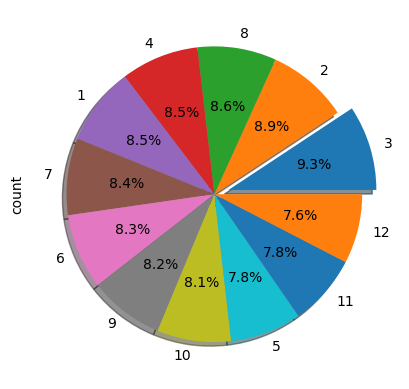

In [53]:
month_counts = df['Month'].value_counts()

# Create an explode list with the same length as the number of unique 'Month' values
explode = [0.1 if i == month_counts.idxmax() else 0 for i in month_counts.index]

# Plot the pie chart
df['Month'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6700\696833257.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_month_counts = df.groupby(['Year', 'Month']).size().unstack().fillna(0)


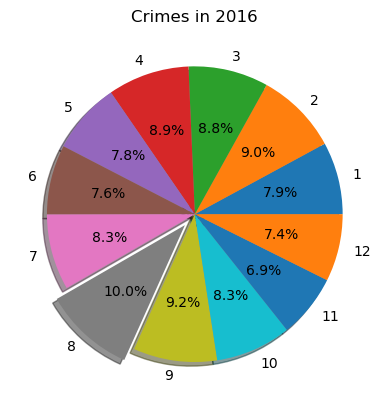

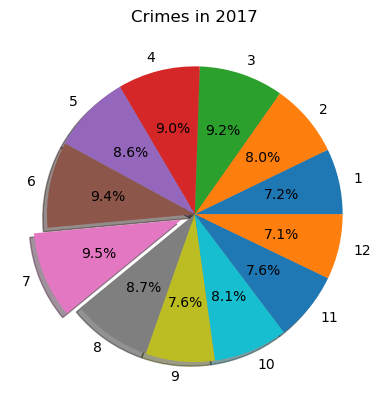

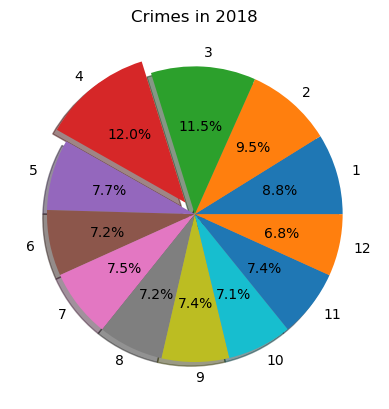

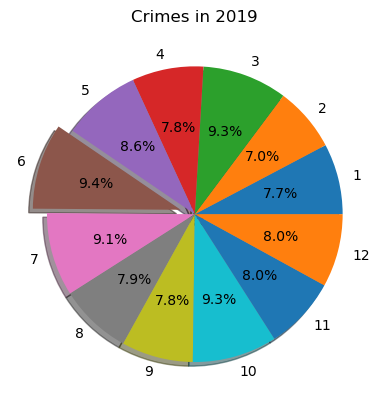

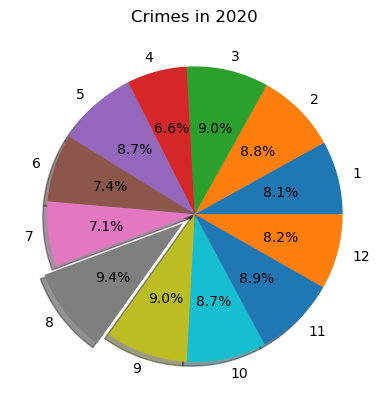

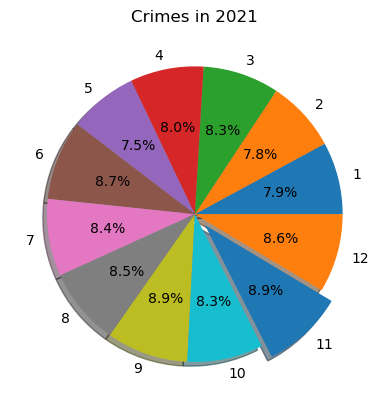

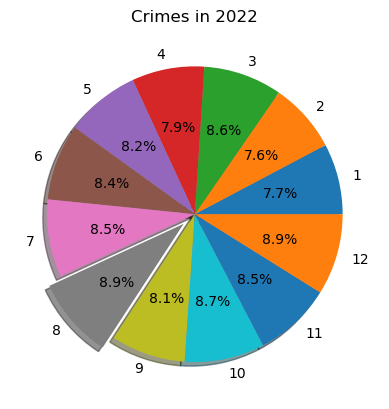

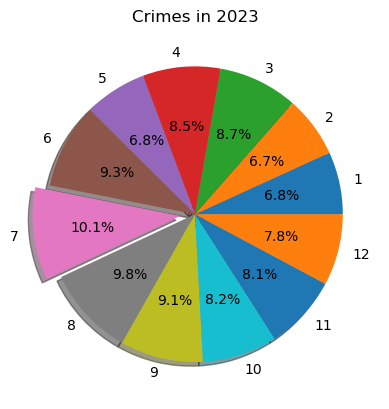

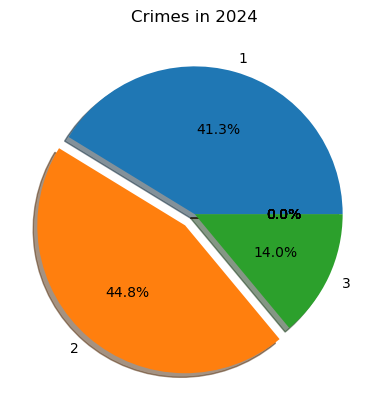

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the crime data

# Convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group by 'Year' and 'Month' and count the number of occurrences
year_month_counts = df.groupby(['Year', 'Month']).size().unstack().fillna(0)

# Plot pie charts for each year
for year in year_month_counts.index:
    month_counts = year_month_counts.loc[year]
    explode = [0.1 if month == month_counts.idxmax() else 0 for month in month_counts.index]
    plt.figure()
    month_counts.plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, title=f'Crimes in {year.year}')
    plt.ylabel('')
    plt.show()

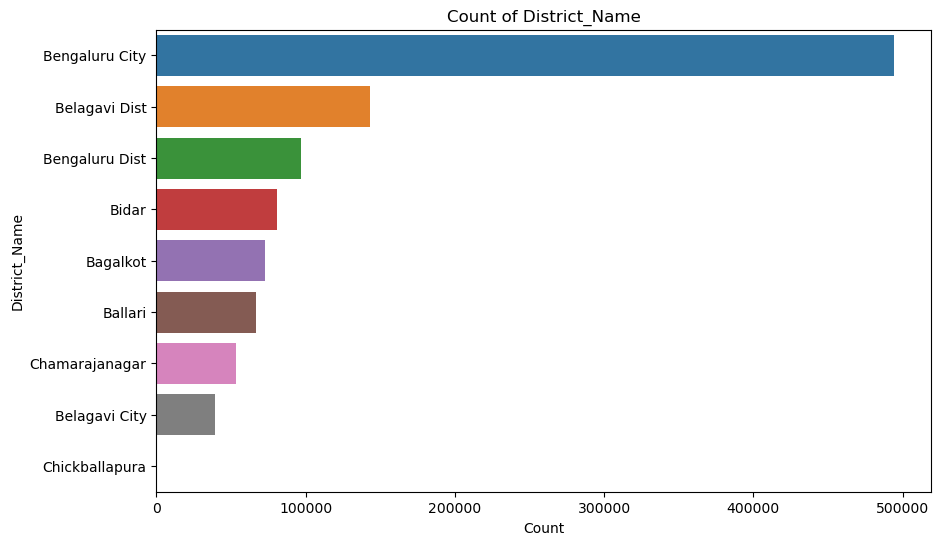

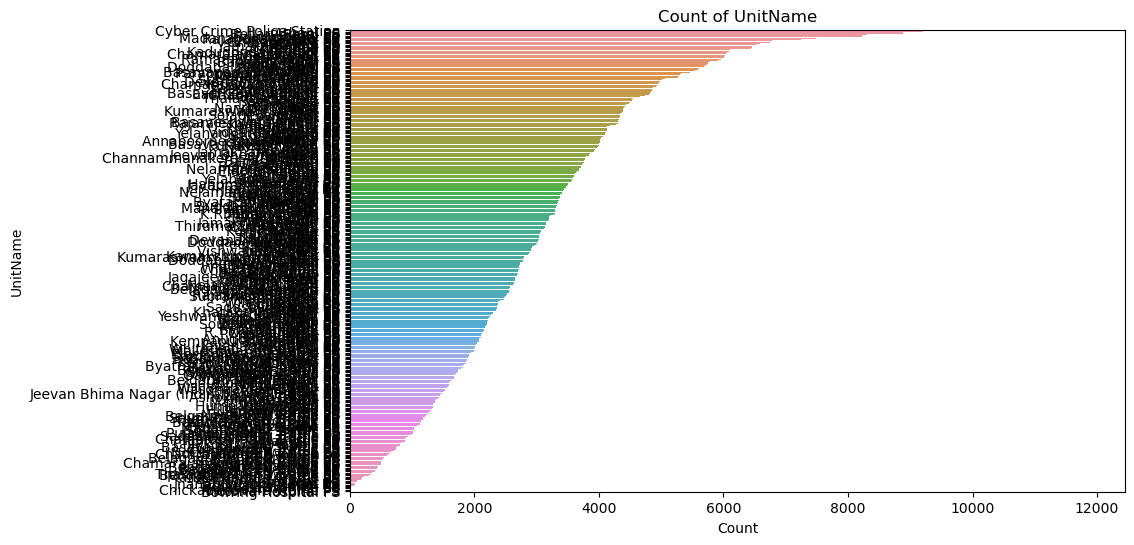

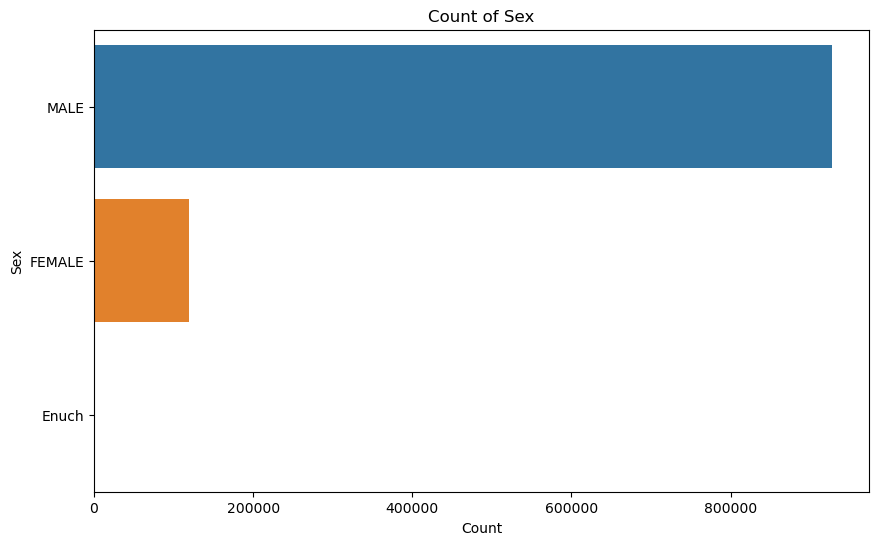

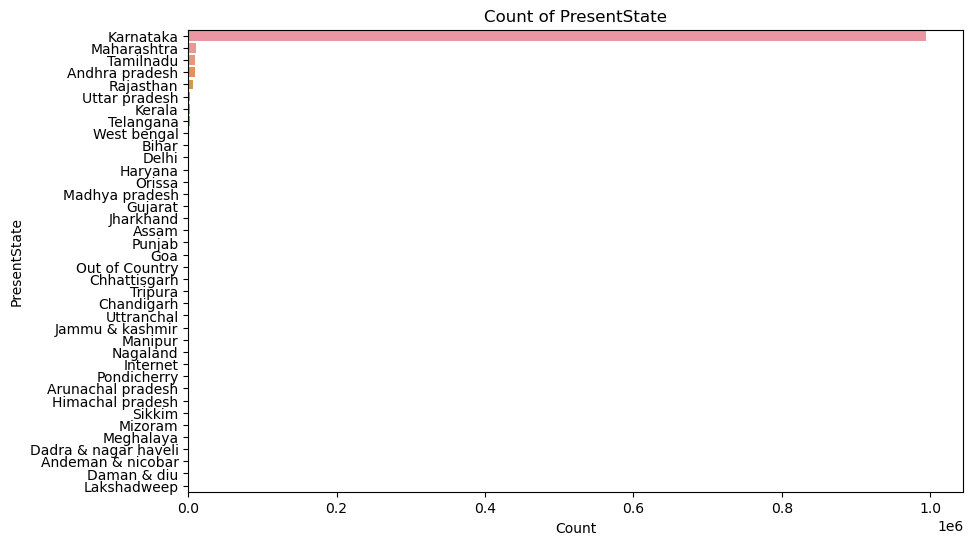

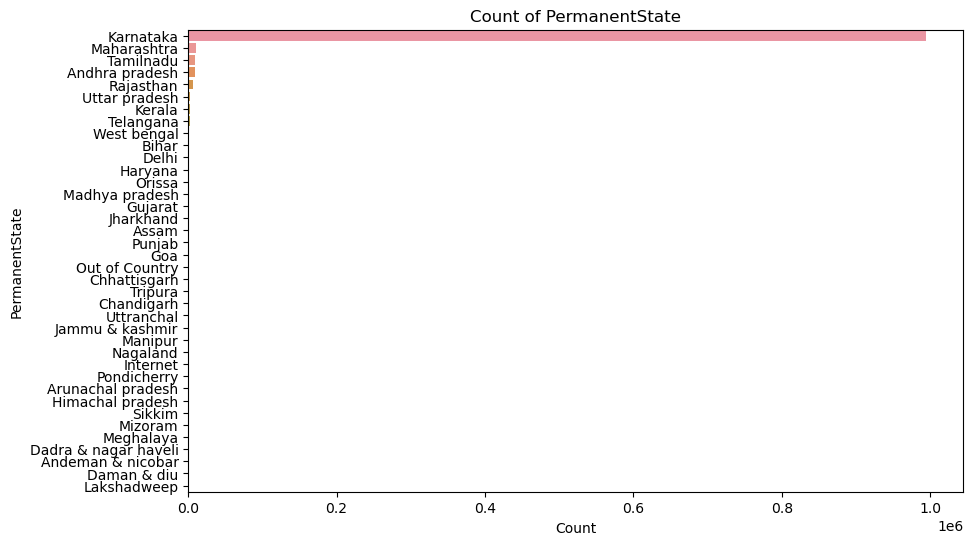

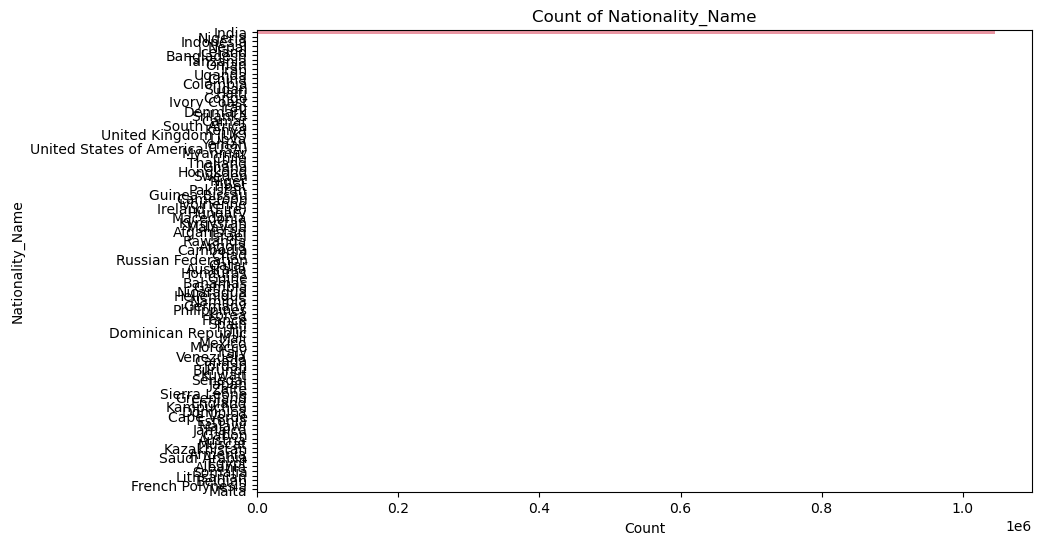

C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


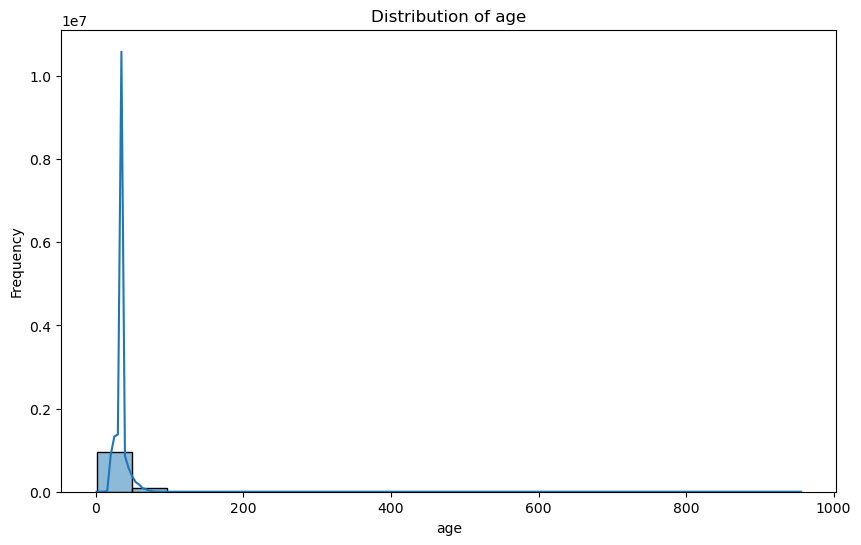

C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


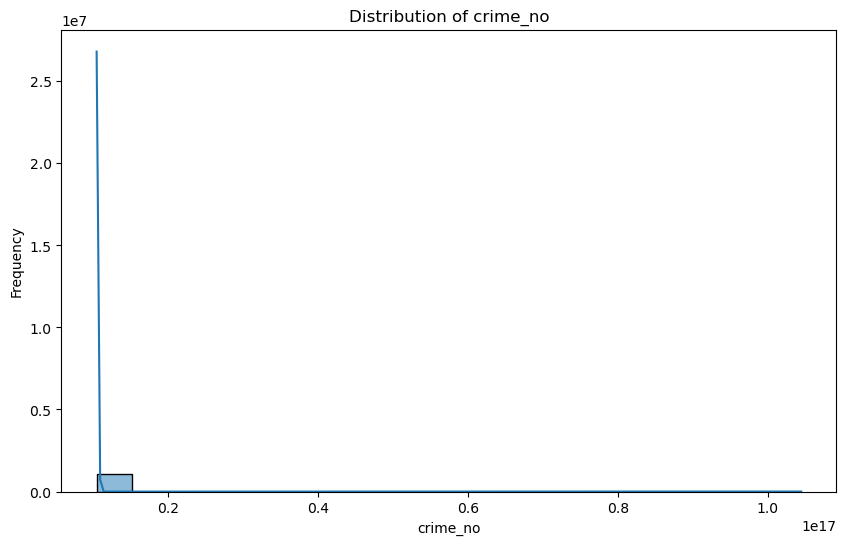

C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


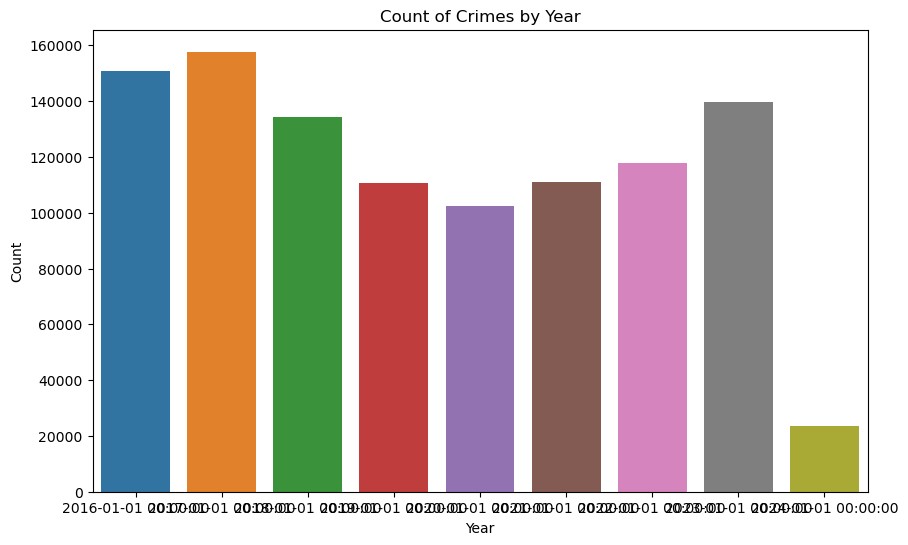

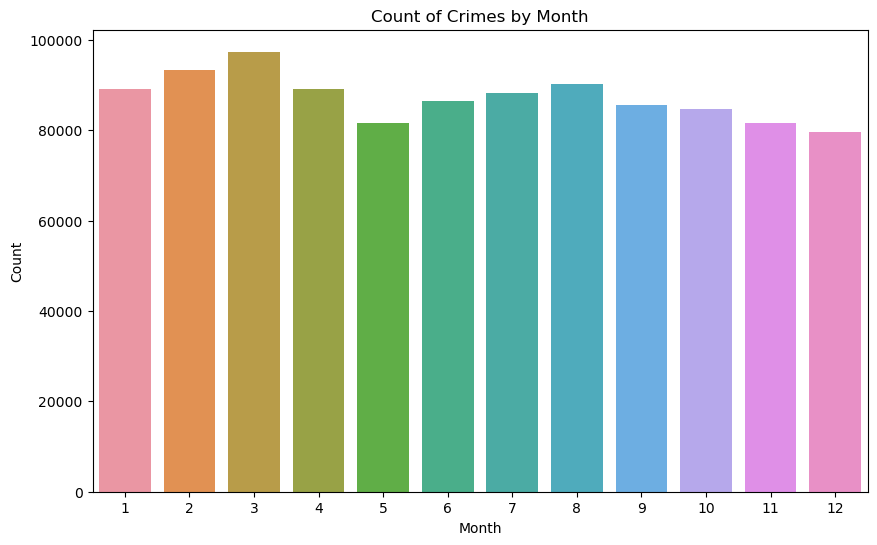

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for categorical attributes
categorical_attributes = ['District_Name', 'UnitName', 'Sex', 'PresentState', 'PermanentState', 'Nationality_Name']
for attribute in categorical_attributes:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=attribute, order=df[attribute].value_counts().index)
    plt.title(f'Count of {attribute}')
    plt.xlabel('Count')
    plt.ylabel(attribute)
    plt.show()

# Visualization for numerical attributes
numerical_attributes = ['age', 'crime_no']
for attribute in numerical_attributes:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=attribute, bins=20, kde=True)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.show()

# Visualization for temporal attributes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year')
plt.title('Count of Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month')
plt.title('Count of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_6700\434394798.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_month_counts = df.groupby(['Year', 'Month']).size().unstack().fillna(0)


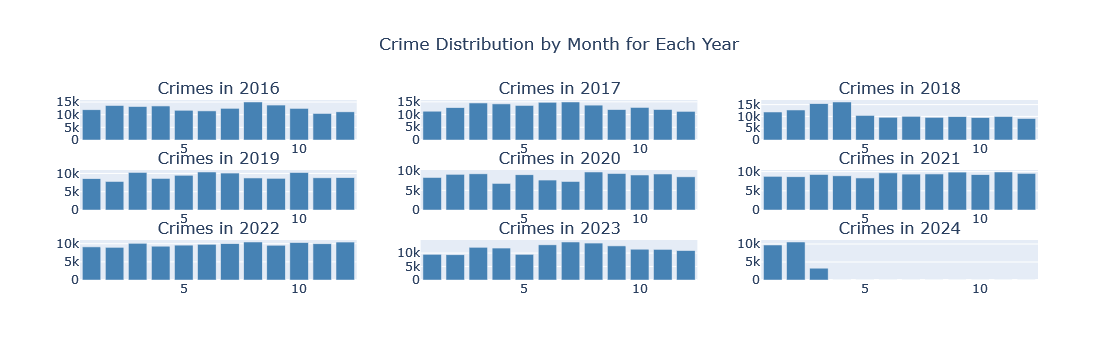

In [56]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming df is your DataFrame containing the crime data

# Convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group by 'Year' and 'Month' and count the number of occurrences
year_month_counts = df.groupby(['Year', 'Month']).size().unstack().fillna(0)

# Create a subplot with 3 rows and 3 columns
fig = make_subplots(rows=3, cols=3, subplot_titles=[f'Crimes in {year.year}' for year in year_month_counts.index])

# Add scatter plots for each year to the subplot
for i, year in enumerate(year_month_counts.index, start=1):
    month_counts = year_month_counts.loc[year]
    x = month_counts.index
    y = month_counts.values
    fig.add_trace(
        go.Bar(x=x, y=y, name=f'Crimes in {year.year}', marker_color='steelblue'),
        row=(i-1) // 3 + 1, col=(i-1) % 3 + 1
    )

# Update layout
fig.update_layout(title_text="Crime Distribution by Month for Each Year", title_x=0.5, showlegend=False)

# Show the plot
fig.show()

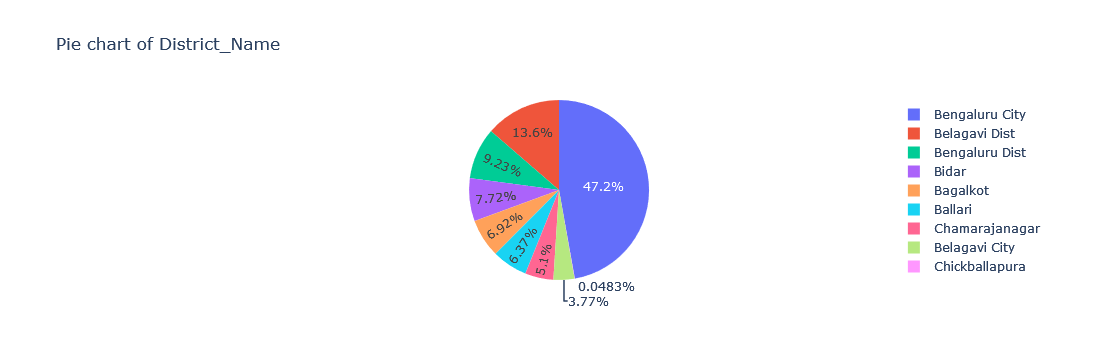

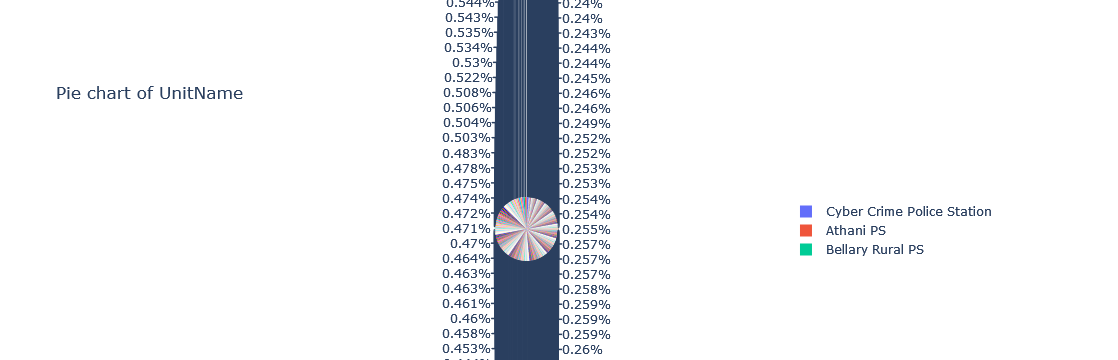

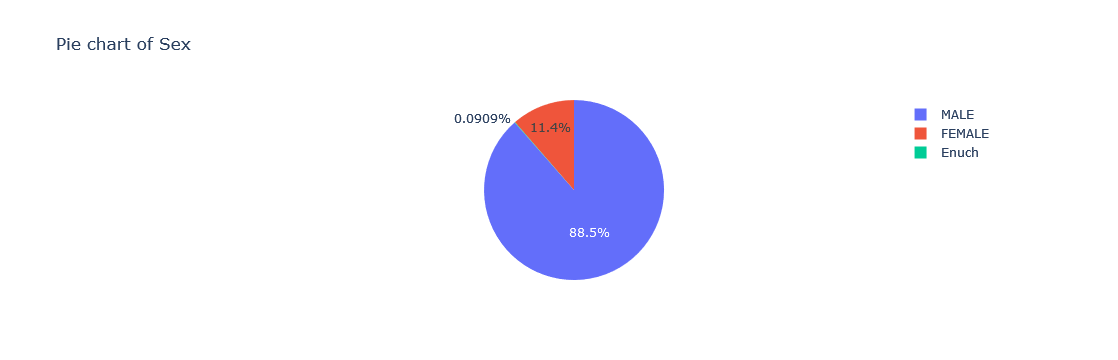

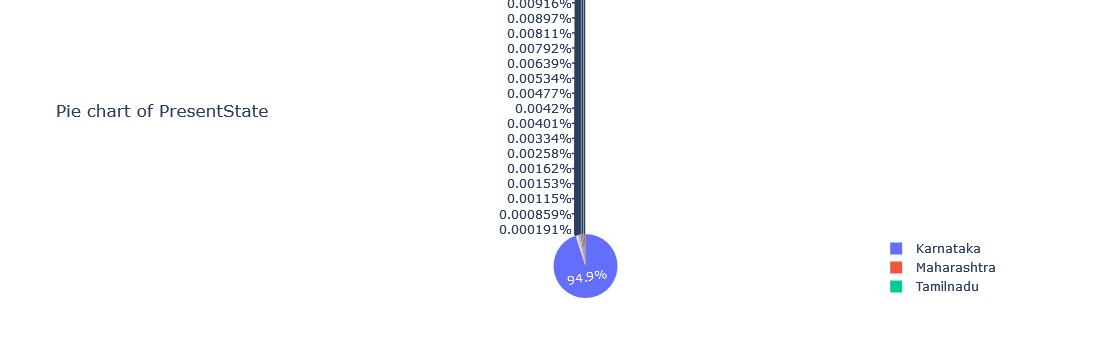

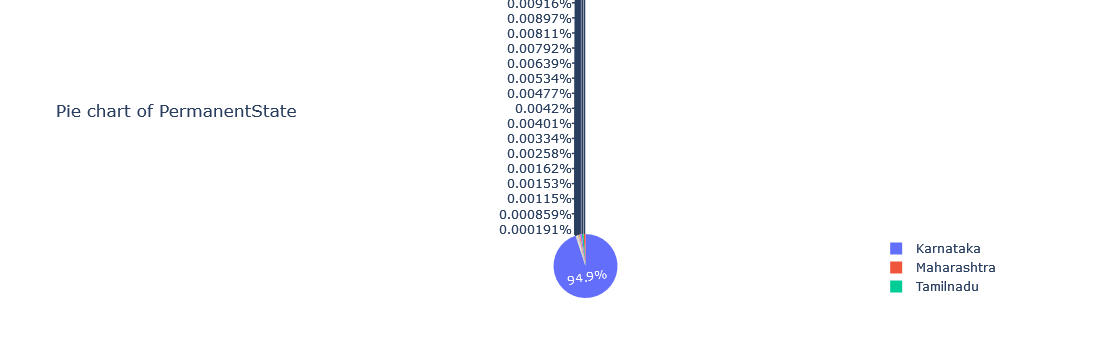

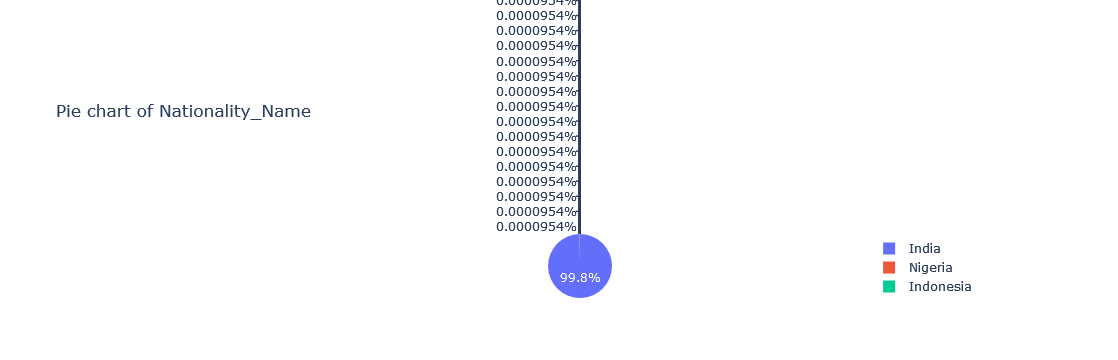

In [57]:
import plotly.express as px

# Visualization for categorical attributes
categorical_attributes = ['District_Name', 'UnitName', 'Sex', 'PresentState', 'PermanentState', 'Nationality_Name']

for attribute in categorical_attributes:
    # Count the occurrences of each category
    attribute_counts = df[attribute].value_counts()
    
    # Create a pie chart using Plotly
    fig = px.pie(names=attribute_counts.index, values=attribute_counts.values, title=f'Pie chart of {attribute}')
    fig.show()


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1047871 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   District_Name     1047871 non-null  object  
 1   UnitName          1047871 non-null  object  
 2   FIRNo             1047871 non-null  object  
 3   Year              1047871 non-null  category
 4   Month             1047871 non-null  int64   
 5   AccusedName       1047871 non-null  object  
 6   Person_Name       1047871 non-null  object  
 7   age               1047871 non-null  float64 
 8   Sex               1047871 non-null  object  
 9   PresentAddress    972698 non-null   object  
 10  PresentCity       1047871 non-null  object  
 11  PresentState      1047871 non-null  object  
 12  PermanentCity     1047871 non-null  object  
 13  PermanentState    1047871 non-null  object  
 14  Nationality_Name  1047871 non-null  object  
 15  Arr_ID            1047871 non-null  i

In [59]:
accused_df=df

In [60]:
df.to_csv('preprocessed_df3.csv', index=False)